<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Wed Dec 23 04:58:17 UTC 2020


In [2]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 416 (delta 107), reused 111 (delta 38), pack-reused 212
Receiving objects: 100% (416/416), 10.21 MiB | 23.54 MiB/s, done.
Resolving deltas: 100% (208/208), done.


# Experiment 1 Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [4]:
tare = [1234.3, 1230.3, 1251.4, 1238.2, 1235.7]
empty = np.mean(tare)
print(empty)

t_c = 5

1237.98


In [5]:
df = pd.read_csv("/content/colosseum/data/experiment_1.txt", sep="\t")

columns = {"Trial": "trial",
           "Experiment [mL/s]":	"flowrate",
           "Total weight [mg]": "total_weight",
           "Fluid weight [mg]":	"fluid_weight"}

df = df.rename(columns=columns)
df["fluid_vol"] = df["fluid_weight"]/1000
df["expected_vol"] = t_c*df["flowrate"]

In [6]:
df

,trial,flowrate,total_weight,fluid_weight,fluid_vol,expected_vol
0,1,0.200,2242.7,1004.72,1.00472,1.000
1,2,0.200,2272.1,1034.12,1.03412,1.000
2,3,0.200,2241.8,1003.82,1.00382,1.000
3,4,0.200,2234.9,996.92,0.99692,1.000
4,5,0.200,2267.2,1029.22,1.02922,1.000
...,...,...,...,...,...,...
195,196,0.025,1407.8,169.82,0.16982,0.125
196,197,0.025,1341.4,103.42,0.10342,0.125
197,198,0.025,1361.0,123.02,0.12302,0.125
198,199,0.025,1405.5,167.52,0.16752,0.125


In [7]:
obs = df.groupby("flowrate")["fluid_vol"].apply(np.array)
exp = obs.index.values*t_c
conditions = np.unique(df["flowrate"].values)

In [8]:
obs

flowrate
0.025    [0.15672, 0.11752, 0.10232, 0.14092, 0.15832, ...
0.050    [0.23962, 0.28352, 0.28022, 0.25762, 0.23012, ...
0.100    [0.52232, 0.51242, 0.51762, 0.51232, 0.48412, ...
0.200    [1.00472, 1.03412, 1.0038200000000002, 0.99691...
Name: fluid_vol, dtype: object

In [9]:
exp

array([0.125, 0.25 , 0.5  , 1.   ])

In [10]:
mean = df.groupby("flowrate")["fluid_vol"].agg(np.mean)
stdev = df.groupby("flowrate")["fluid_vol"].agg(np.std)

In [11]:
mean

flowrate
0.025    0.131152
0.050    0.257916
0.100    0.509406
0.200    1.019212
Name: fluid_vol, dtype: float64

In [12]:
stdev

flowrate
0.025    0.019316
0.050    0.021444
0.100    0.016786
0.200    0.020812
Name: fluid_vol, dtype: float64

In [13]:
def violinplot(data, ax, **kwd): 
    xticklabels = kwd.get("xticklabels", [])
    xticks = kwd.get("xticks", [])
    selected = kwd.get("selected", None)
    color = kwd.get("color", "lightgrey")
    
    if  len(xticks)==0: xticks = np.arange(len(data))+1;
    if  len(xticklabels)==0: xticklabels = np.arange(len(data))+1;
    assert(len(xticks) == len(xticklabels))
        
    violins = ax.violinplot(data, positions=xticks, showmeans=False, showmedians=False, showextrema=False)
    
    for vidx, v in enumerate(violins['bodies']):
        v.set_facecolor(color)
        v.set_edgecolor('black')
        v.set_alpha(1)
        if selected == vidx:
            v.set_facecolor("#D43F3A")

            
    
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.04, size=len(d))
        
        # actual points
        ax.scatter(xx, d, s = 5, color="white", edgecolor="black", linewidth=1)
        
        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))
        ax.scatter(x, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
        ax.vlines(x, mean - stdev, mean+stdev, color='black', linestyle='-', lw=2, zorder=9)
        
    ax.set(**{"xticks": xticks, "xticklabels":xticklabels})
    
    return ax

In [14]:
err = (obs-exp)

In [15]:
exp

array([0.125, 0.25 , 0.5  , 1.   ])

In [16]:
obs

flowrate
0.025    [0.15672, 0.11752, 0.10232, 0.14092, 0.15832, ...
0.050    [0.23962, 0.28352, 0.28022, 0.25762, 0.23012, ...
0.100    [0.52232, 0.51242, 0.51762, 0.51232, 0.48412, ...
0.200    [1.00472, 1.03412, 1.0038200000000002, 0.99691...
Name: fluid_vol, dtype: object

In [17]:
err

flowrate
0.025    [0.03172, -0.0074800000000000005, -0.022680000...
0.050    [-0.01038, 0.033519999999999994, 0.03022000000...
0.100    [0.022320000000000007, 0.012419999999999987, 0...
0.200    [0.0047200000000000575, 0.03411999999999993, 0...
Name: fluid_vol, dtype: object

In [18]:
err/exp*100

flowrate
0.025    [25.375999999999998, -5.984, -18.1440000000000...
0.050    [-4.152, 13.407999999999998, 12.08800000000001...
0.100    [4.464000000000001, 2.4839999999999973, 3.5239...
0.200    [0.47200000000000575, 3.411999999999993, 0.382...
Name: fluid_vol, dtype: object

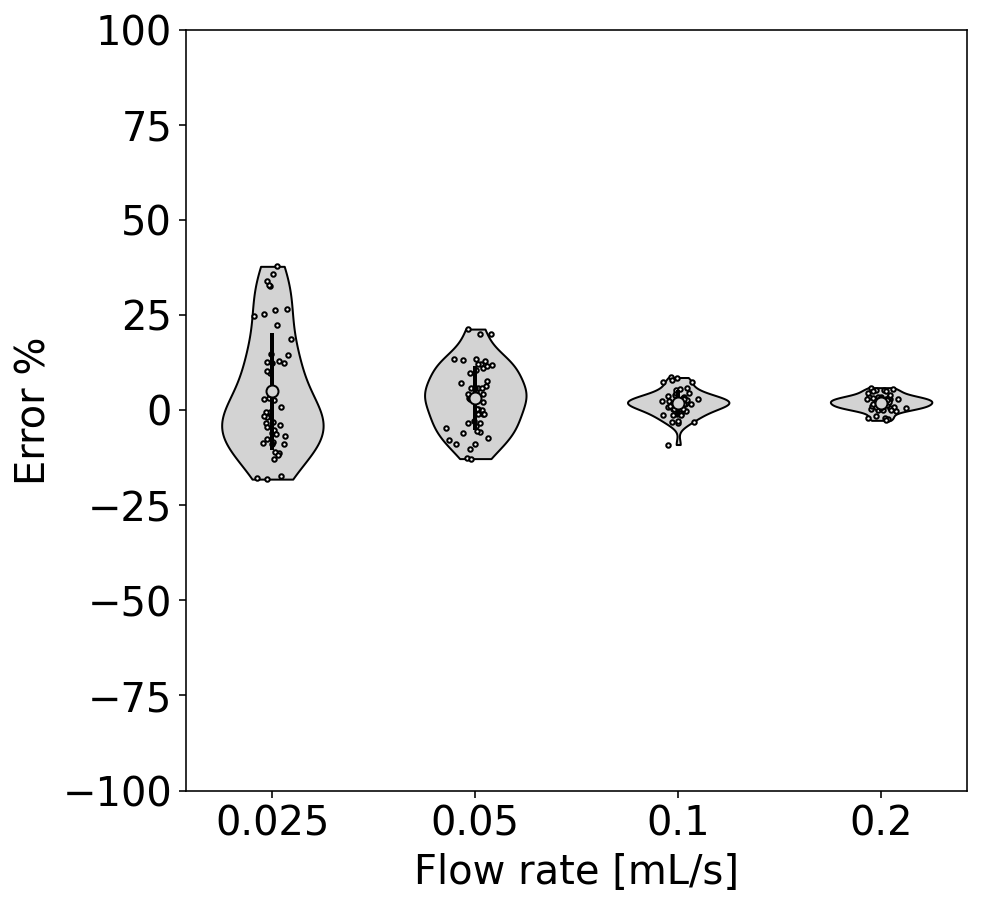

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

errors = (err/exp*100).values

violinplot(errors, ax, xticklabels=conditions)

ax.set(**{
    "xlabel": "Flow rate [mL/s]",
    "ylabel": "Error %",
    "ylim": (-100, 100)
})


fig.show()

In [20]:
23000/60/60

6.388888888888888

In [57]:
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

In [58]:
lens = obs.apply(lambda x: len(x)).values
X = np.repeat(obs.index.values, lens)
XX = sm.add_constant(X)

Y = np.concatenate(obs.values)

In [63]:
ols = sm.OLS(Y, XX).fit()

In [65]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.023e+04
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          6.08e-248
Time:                        05:16:50   Log-Likelihood:                 503.69
No. Observations:                 200   AIC:                            -1003.
Df Residuals:                     198   BIC:                            -996.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.002      1.565      0.1

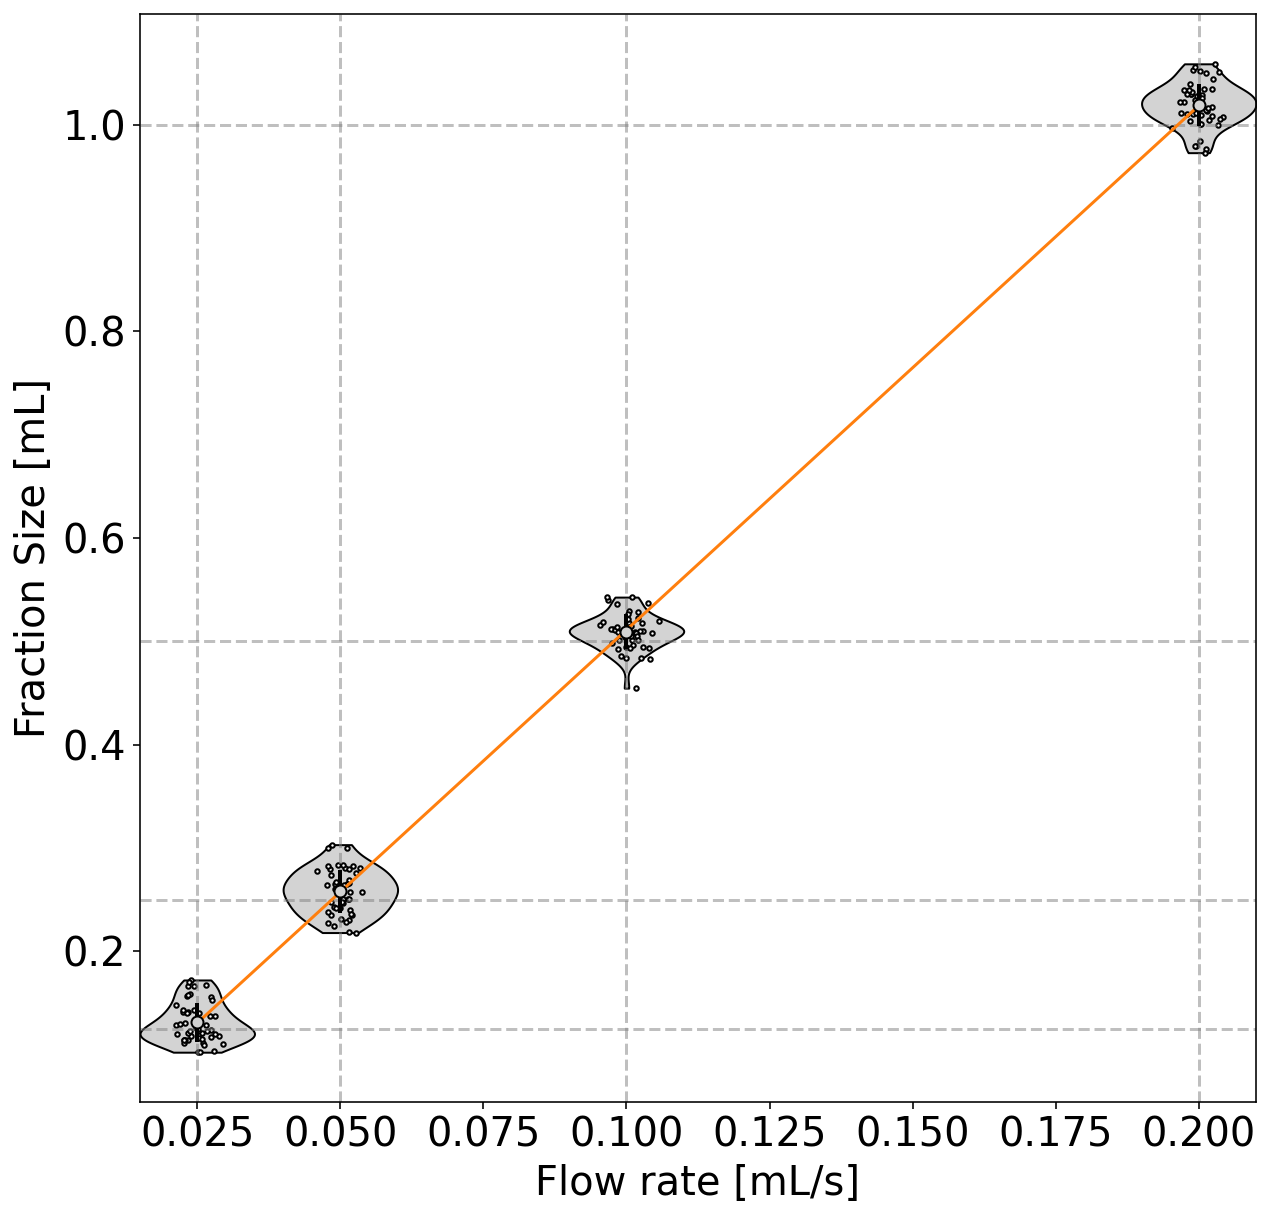

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))

parts = ax.violinplot(obs.values, conditions, widths=0.02,
                      showmeans=False, showextrema=False, showmedians=False,
                      bw_method='silverman')
for idx, condish in enumerate(conditions):
    x = np.random.normal(condish, 0.002, size=len(obs.values[idx]))
    ax.scatter(x, obs.values[idx], s=5, color="white", edgecolor="black", linewidth=1)

# Means
mean  = np.array([i.mean() for i in obs.values])
stdev = np.array([np.sqrt(np.var(i)) for i in obs.values])
ax.scatter(conditions, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
ax.vlines(conditions, mean - stdev, mean+stdev, color='black', linestyle='-', lw=2, zorder=9)

for pc in parts['bodies']:
    pc.set_facecolor('lightgrey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

ax.axhline(y=0.125, color ='grey', alpha=0.5, linestyle="--")
ax.axvline(x=0.025, color ='grey', alpha=0.5, linestyle="--")

ax.axhline(y=0.250, color ='grey', alpha=0.5, linestyle="--")
ax.axvline(x=0.050, color ='grey', alpha=0.5, linestyle="--")

ax.axhline(y=0.500, color ='grey', alpha=0.5, linestyle="--")
ax.axvline(x=0.100, color ='grey', alpha=0.5, linestyle="--")

ax.axhline(y=1.000, color='grey', alpha=0.5, linestyle="--")
ax.axvline(x=0.2000, color='grey', alpha=0.5, linestyle="--")

x = np.array([conditions.min(), conditions.max()])
ax.plot(x, ols.params[0]+ols.params[1]*x)

ax.set_xlim(0.015, 0.21)

ax.set(**{
    "xlabel": "Flow rate [mL/s]",
    "ylabel": "Fraction Size [mL]"
})
# plt.savefig("../figures/fraction_flowrate.pdf", bbox_inches='tight')
# plt.savefig("../figures/fraction_flowrate.png", bbox_inches='tight', dpi=100)
fig.show()

# Experiment 2 Analysis

In [68]:
df2 = pd.read_csv("/content/colosseum/data/experiment_2.txt", sep="\t")

In [69]:
df2.head()

,Collection Time (s),Experiment,Total weight [mg],Fluid weight [mg]
0,2,1,1348.2,110.22
1,4,1,1477.7,239.72
2,6,1,1561.2,323.22
3,8,1,1619.7,381.72
4,10,1,1785.7,547.72


In [70]:
experiments = np.unique(df2["Experiment"].values)
tpts = np.arange(2, 32, 2)
means = df2.groupby(["Collection Time (s)"])["Fluid weight [mg]"].mean()

In [71]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tpts, means)

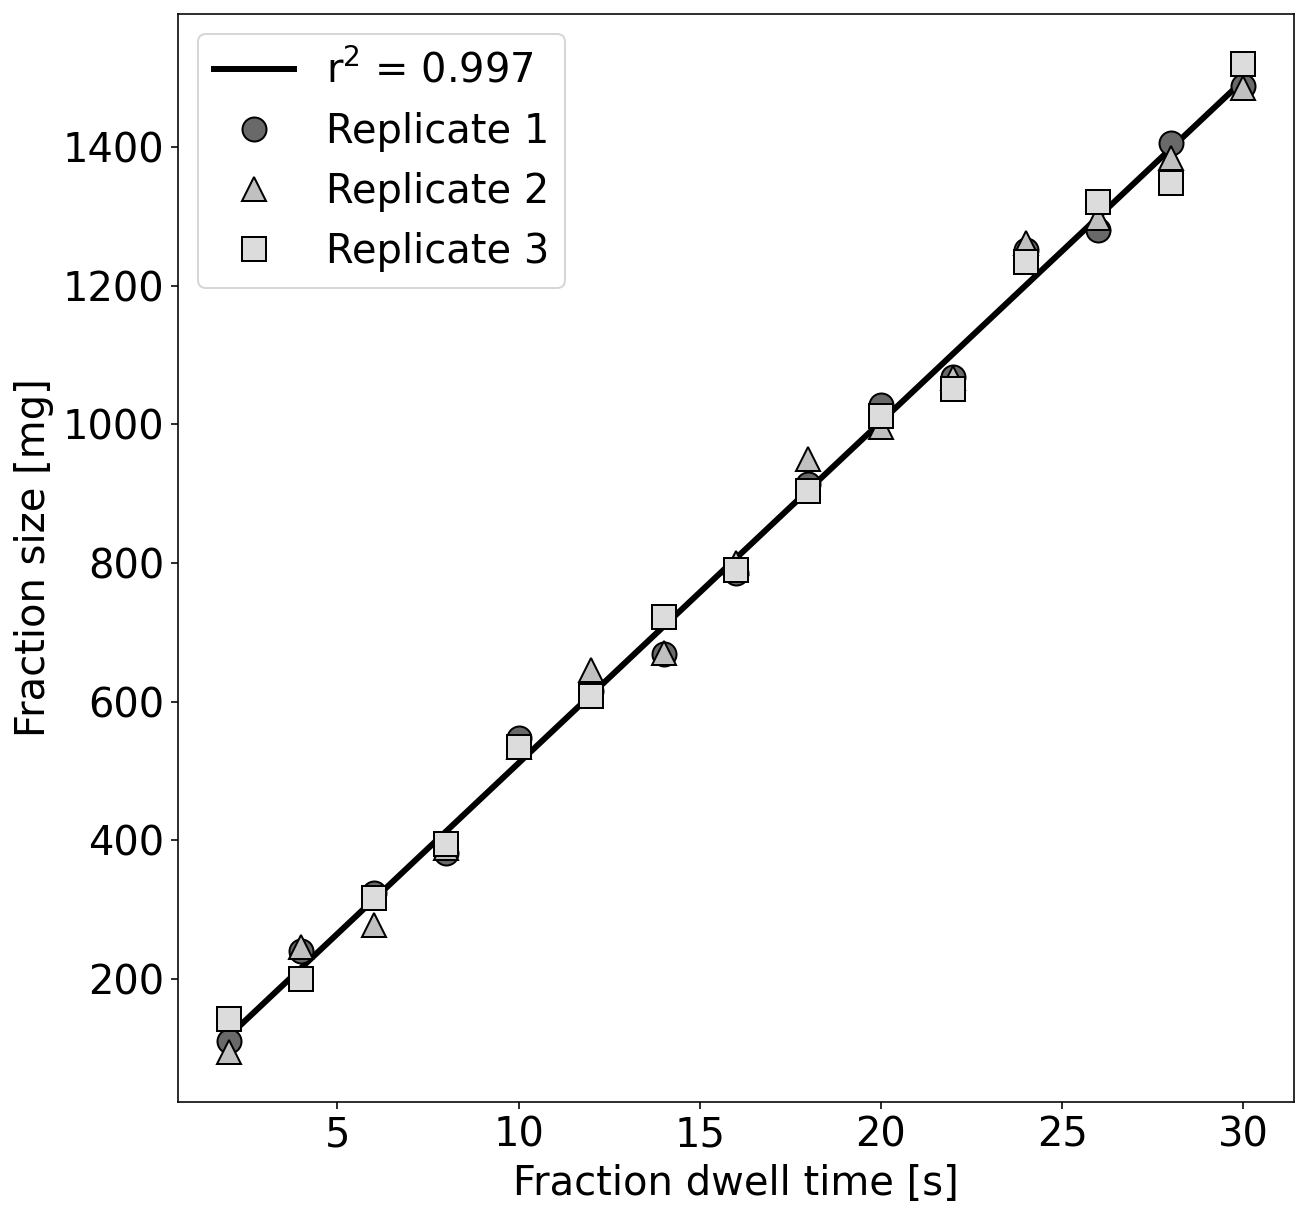

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(tpts, intercept + slope*tpts, 'black', label='r$^2$ = {:.3f}'.format(r_value**2), linewidth=3)


shapes = ["o", "^", "s"]
colors = ["dimgrey", "silver", "gainsboro"]

for idx, exp in enumerate(experiments):
    tmp = df2[df2["Experiment"] == exp]
    cumsum = tmp["Fluid weight [mg]"].values.cumsum()
    
    ax.plot(tmp["Collection Time (s)"].values, tmp["Fluid weight [mg]"].values, label="Replicate {}".format(idx+1),linestyle='None', marker=shapes[idx], color=colors[idx], markeredgecolor='black', markersize=12)
    
ax.set_xlabel("Fraction dwell time [s]")
ax.set_ylabel("Fraction size [mg]")


plt.legend()

# plt.savefig("../figures/fraction_dwelltime.pdf", bbox_inches='tight')
# plt.savefig("../figures/fraction_dwelltime.png", bbox_inches='tight', dpi=100)


plt.show()

# Plot Archimedian spiral

In [73]:
def spiral_points(arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi))

    # yield a point at origin
    yield (0, 0)

    # initialize the next point in the required distance
    r = arc
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi

In [74]:
xx = []
yy = []
n_tubes = 88
data = np.zeros((n_tubes,2))
for idx, i in enumerate(spiral_points(arc=13, separation=19.5)):
    if idx==n_tubes:
        break
    data[idx] = i


In [75]:
theta = []
for x, y in data:
    t = math.atan2(y,x)
    theta.append(t)
theta = np.array(theta)*180*200/np.pi/360

In [76]:
b = 19.5/(2*np.pi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


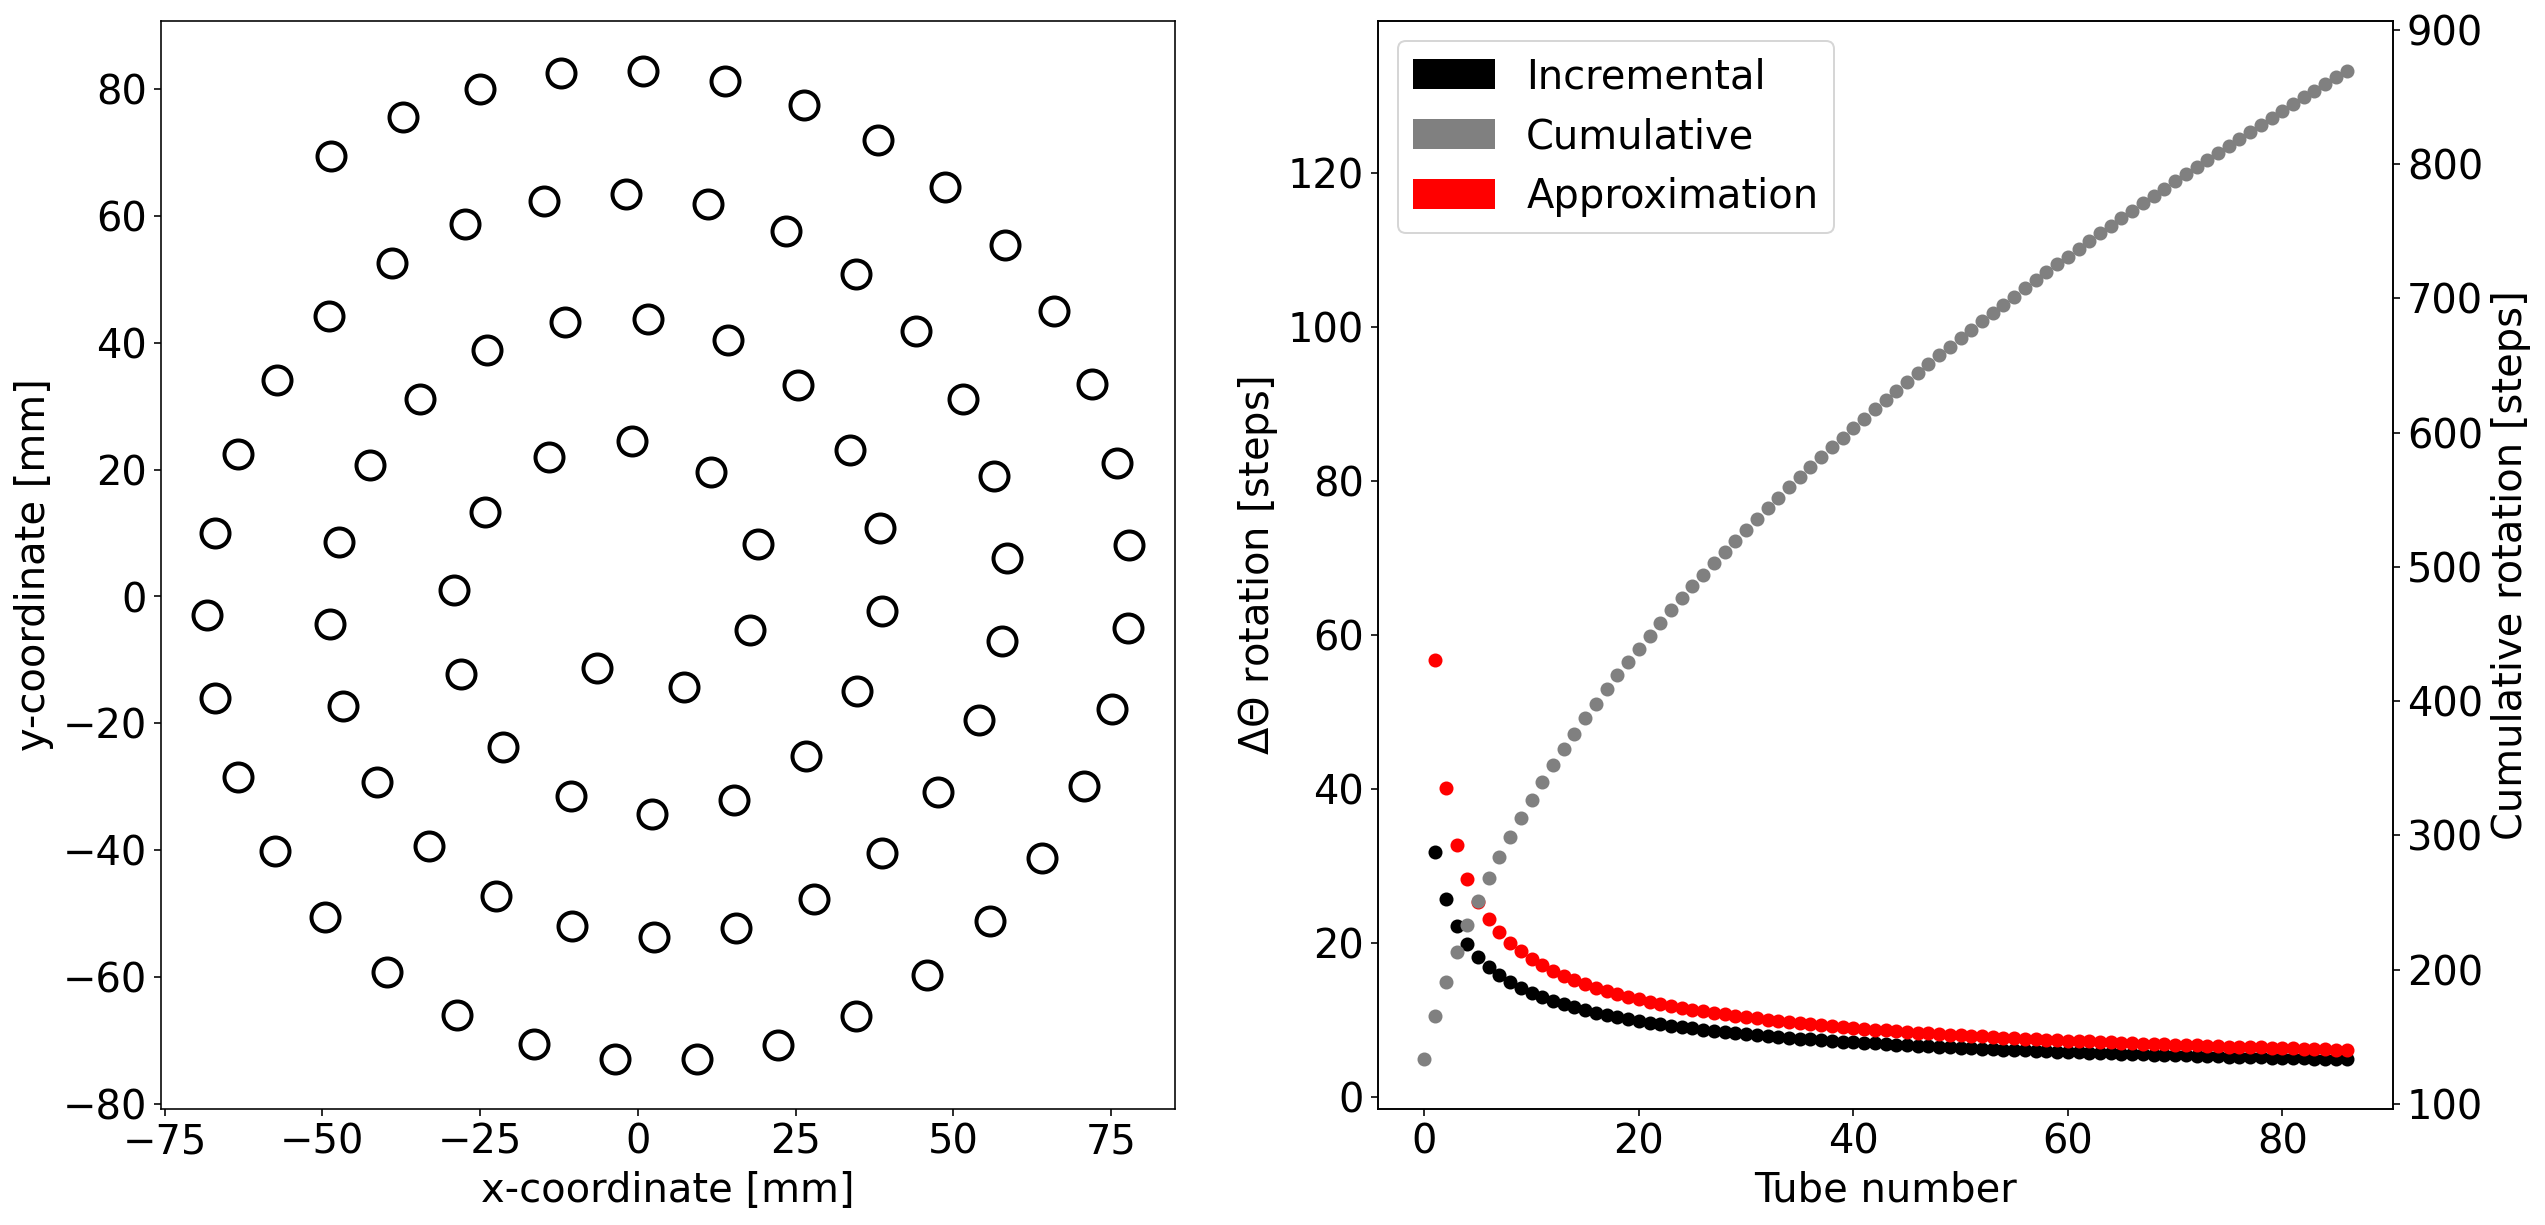

In [77]:
fig, ax = plt.subplots(figsize=(10*2, 10), ncols=2)

xx = data[:,0][1:]
yy = data[:,1][1:]

ax[0].plot(xx,yy, 'o', ms=14, markerfacecolor="None",markeredgecolor='black', markeredgewidth=2)
ax[0].set_xlabel("x-coordinate [mm]")
ax[0].set_ylabel("y-coordinate [mm]")

ax2 = ax[1].twinx()
xx = np.arange(len(theta)-1)
yy = theta[1:] - theta[:-1]

# to fix the the jump in theta due to branch cuts
# we add a contant back to those values that cross the
# branch. There is certainly a more elegant way to do this.

for idx, i in enumerate(yy):
    if i < -50:
        yy[idx] = yy[idx] + 200

ax[1].scatter(xx, yy, color="black")
ax2.scatter(xx, np.cumsum(yy), color="grey", zorder=-1)
ax2.set_ylabel("Cumulative rotation [steps]")
ax[1].scatter(xx, np.pi/np.sqrt(b*xx)*180*200/np.pi/360, color='r')

ax[1].set_xlabel("Tube number")
ax[1].set_ylabel("$\Delta \Theta$ rotation [steps]")

grey_patch = mpatches.Patch(color='grey', label='Cumulative')
black_patch = mpatches.Patch(color='black', label='Incremental')
red_patch = mpatches.Patch(color='red', label='Approximation')

plt.legend(handles=[black_patch, grey_patch, red_patch], loc="upper left")

# plt.savefig("../figures/analytical.pdf", bbox_inches='tight')
# plt.savefig("../figures/analytical.png", bbox_inches='tight', dpi=100)


fig.show()

# Scalability plot

In [78]:
fr = 10 # mL/hr
fractions = 88
per_volume = 1 # mL
num_fc = np.arange(1, 20)

hours = fractions*per_volume / num_fc/fr
cost_per = 70

In [79]:
fractions/fr/num_fc

array([8.8       , 4.4       , 2.93333333, 2.2       , 1.76      ,
       1.46666667, 1.25714286, 1.1       , 0.97777778, 0.88      ,
       0.8       , 0.73333333, 0.67692308, 0.62857143, 0.58666667,
       0.55      , 0.51764706, 0.48888889, 0.46315789])

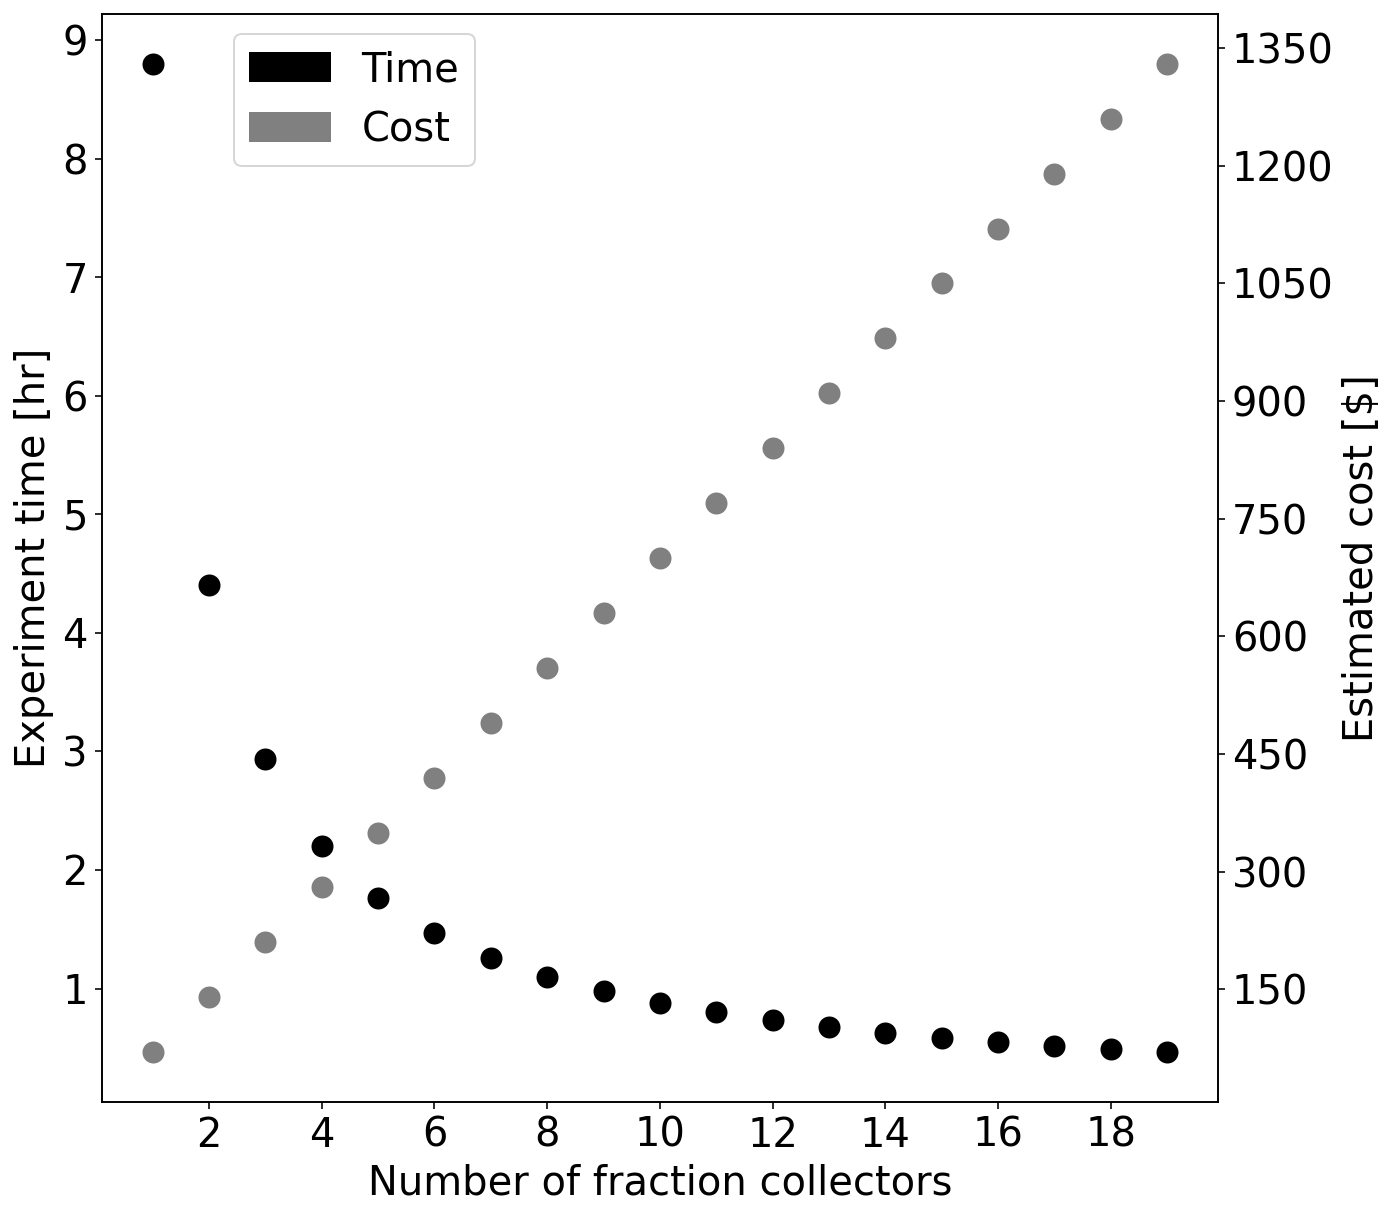

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax2 = ax.twinx()

ax.scatter(num_fc, hours, c='k', s=100, label="Time")

ax.set_xlabel("Number of fraction collectors")
ax.set_ylabel("Experiment time [hr]")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


ax2.scatter(num_fc, [i*cost_per for i in range(1, 20)], c='grey', s=100, label="Cost")

ax2.set_ylabel("Estimated cost [$]")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

grey_patch = mpatches.Patch(color='grey', label='Cost')
black_patch = mpatches.Patch(color='black', label='Time')
plt.legend(handles=[black_patch, grey_patch], loc="upper left", bbox_to_anchor=(0.1, 1))

# plt.savefig("../figures/time_cost_scale.pdf", bbox_inches='tight')
# plt.savefig("../figures/time_cost_scale.png", bbox_inches='tight', dpi=100)


fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


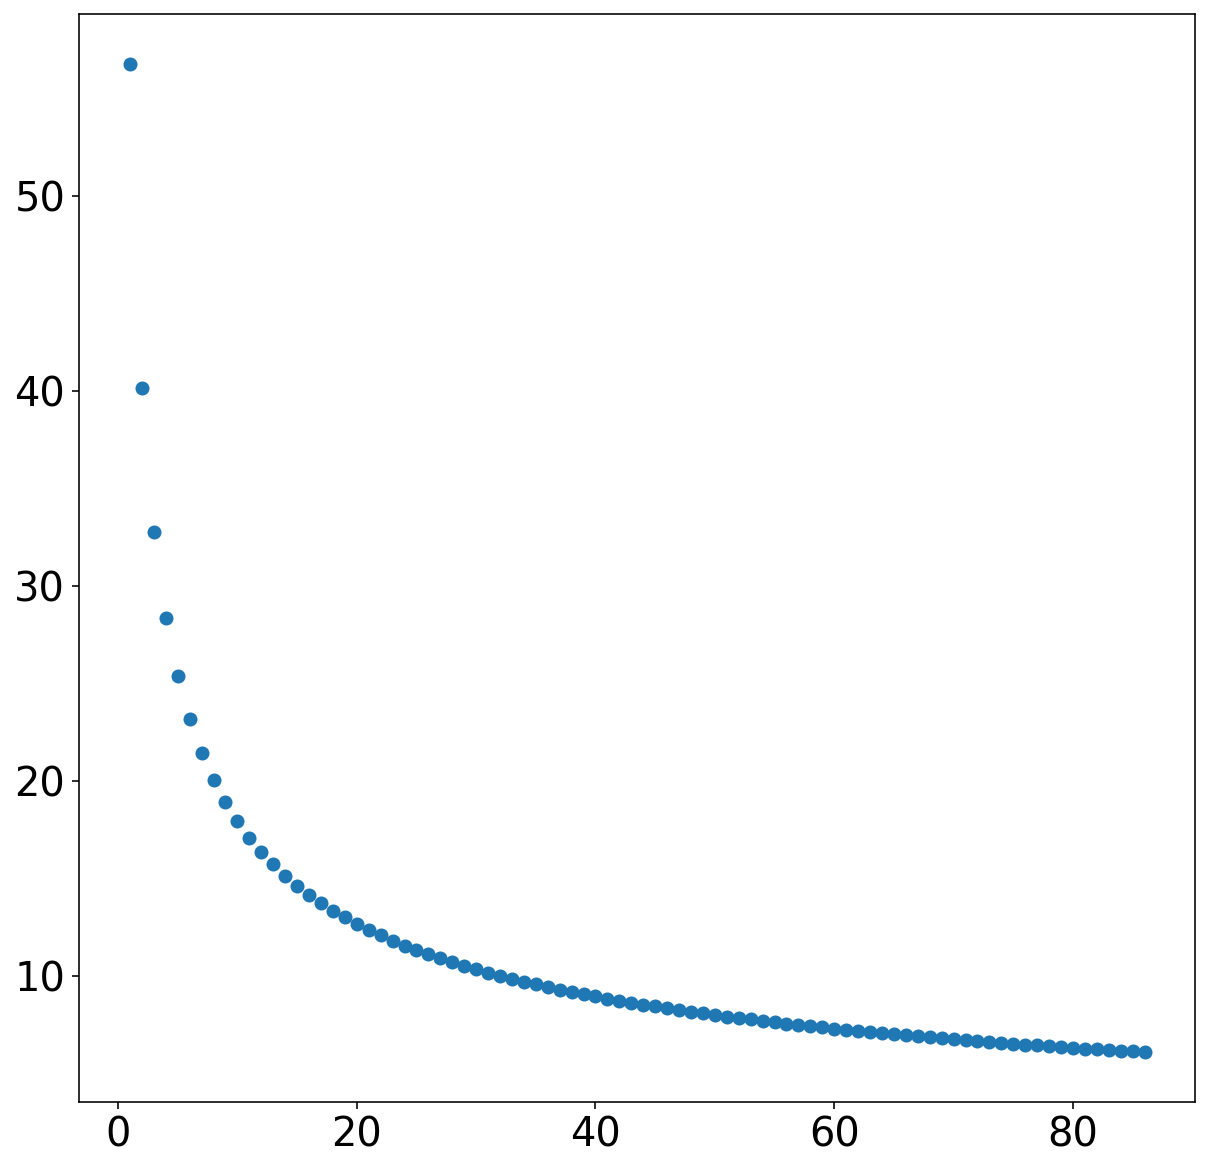

In [81]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(xx, np.pi/np.sqrt(b*xx)*180*200/np.pi/360)

plt.show()